In [1]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
import seaborn as sns
rcParams['figure.figsize']=10,8
#importing normalisation package
from sklearn.preprocessing import StandardScaler         
#importing train test split
from sklearn.model_selection import train_test_split          
#importing mean squared error and mean absolute error
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from scipy import stats
#importing feature selection libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import  RFE
from sklearn import model_selection
#importing label encoder to encode text data into their numerical factors
from sklearn.preprocessing import LabelEncoder, OneHotEncoder   
#importing regression packages
from sklearn.linear_model import LinearRegression    
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR 
from sklearn.tree import DecisionTreeRegressor


#Importing data 
data= pd.read_excel('data.xlsx')
#checking nulls
print("Status of nulls in data - ",data.isnull().values.any())

new_data=pd.DataFrame(data)
#Removing necessary fields
new_data=new_data.drop('State_Name',1)
new_data=new_data.drop('District_Name',1)
new_data=new_data.drop('Latitude',1)
new_data=new_data.drop('Longitude',1)
new_data=new_data.drop('Reaping Month',1)
new_data=new_data.drop('Crop_Year',1)
#new_data=new_data.drop('Season',1)
#new_data=new_data.drop('Price_per_100kg',1)

new_data.head(5)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Status of nulls in data -  False


Year       Season  Gdp_in_100,000  ...  Price_per_100kg   Area  Production
0  2000  Kharif               818.39  ...           580.00  25430       31871
1  2000  Kharif               818.39  ...           864.50  21654       23225
2  2000  Rabi                 818.39  ...           775.35  33371       29105
3  2001  Kharif               918.45  ...           600.00  31368       38446
4  2001  Kharif               918.45  ...           873.63  22633       25051

[5 rows x 11 columns]

In [0]:
#y-target features
Y=new_data.iloc[:,new_data.columns == 'Production'].values
#X-input features        
X=new_data.iloc[:,new_data.columns != 'Production'].values   

##################Converting X into and array#####################
onehotencoder= OneHotEncoder()

#Turning the numbers to dummy variables. Each column represents one 
#state compare the X and dataset tables to understand the 
#relationship between the state and the columns
X= onehotencoder.fit_transform(X).toarray()

#Splitting the dataset into the Training and Test dataset
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.3, random_state=33)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Algorithm     RMSE  R2_Score
0  Multiple Linear Regression  2896.89     75.06
1    Random Forest Regression  3060.02     72.17
2      K Neighbors Regression  4349.33     43.78
3   Support Vector Regression  6038.06     -8.36
4    Decision Tree Regression  6778.94    -36.59

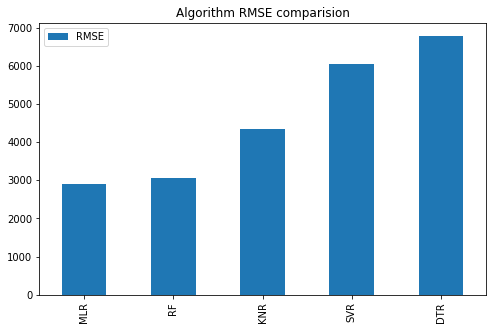

In [3]:
# preparing models
models = []
models.append(('Multiple Linear Regression', LinearRegression()))
models.append(('Random Forest Regression', RandomForestRegressor(max_depth=10, random_state=21)))
models.append(('K Neighbors Regression', KNeighborsRegressor(n_neighbors=8)))
models.append(('Support Vector Regression', SVR(C=1.0, epsilon=0.2)))
models.append(('Decision Tree Regression', DecisionTreeRegressor(random_state = 0)))

# evaluate each model in turn
rmse_scores = []
r_scores = []
names = []
predicted = []
actual = []

for name, model in models:
  
  model.fit(X_train,Y_train)
  
  #Predicting the Test set results:
  y_pred = np.round(model.predict(X_test),decimals=2)
  rmse = np.sqrt(mean_squared_error(Y_test,y_pred)) 
  r_score=r2_score(Y_test, y_pred)

  #storing value in array to be used in data frame
  predicted=y_pred
  actual=Y_test
  rmse_scores.append(np.round(rmse,2))
  r_scores.append(np.round(r_score*100,2))
  names.append(name)


df=pd.DataFrame({'Algorithm': names,'RMSE': rmse_scores, 'R2_Score': r_scores})



#df.boxplot(by="name", column="RMSE")
plotdata = pd.DataFrame({"RMSE":rmse_scores},index=['MLR','RF','KNR','SVR','DTR'])
plotdata.plot.bar(figsize=(8,5),title="Algorithm RMSE comparision")

df



In [4]:
###########################################################################
##################to show OLS summarry for Multiple LR#####################
###########################################################################
import statsmodels.api as sm

X_opt= X[:, [0,1,2,3,4,5,6,7,8,9,10]]
#Optimal X contains the highly impacted independent variables

regressor_OLS=sm.OLS(endog = Y, exog = X_opt ).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.746
Model:                            OLS   Adj. R-squared (uncentered):              0.663
Method:                 Least Squares   F-statistic:                              9.065
Date:                Wed, 20 May 2020   Prob (F-statistic):                    2.89e-07
Time:                        11:27:58   Log-Likelihood:                         -494.65
No. Observations:                  45   AIC:                                      1011.
Df Residuals:                      34   BIC:                                      1031.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          2.807e+04   9547.800      2.940      0.006    8663.535    4.75e+04
x2          3.294e+04   9547.800      3.450      0.002    1.35e+04    5.23e+04
x3          2.727e+04   9547.800      2.857      0.007    7871.202    4.67e+04
x4          3.129e+04   9547.800      3.277      0.002    1.19e+04    5.07e+04
x5          3.305e+04   9547.800      3.462      0.001    1.37e+04    5.25e+04
x6          2.279e+04   9547.800      2.387      0.023    3382.869    4.22e+04
x7          3.537e+04   9547.800      3.705      0.001     1.6e+04    5.48e+04
x8           2.75e+04   9547.800      2.880      0.007    8092.869    4.69e+04
x9          2.486e+04   9547.800      2.603      0.014    5453.869    4.43e+04
x10         2.398e+04   9547.800      2.511      0.017    4572.202    4.34e+04
x11         2.614e+04   9547.800      2.738      0.010    6735.202    4.55e+04
==============================================================================
Omnibus:                        5.056   Durbin-Watson:                   0.518
Prob(Omnibus):                  0.080   Jarque-Bera (JB):                4.290
Skew:                           0.659   Prob(JB):                        0.117
Kurtosis:                       2.258   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
#checking total recommended features by RFE
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

#no of features
nof_list=np.arange(1,10)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 9
Score with 9 features: 0.536302


In [6]:

######as suggested in previous column, we will try to get top 9 variable 

cols = list(new_data.drop('Production',1).columns)
X=new_data.drop('Production',1)
y=new_data['Production']

#Encoding the categorical variables:
labelencoder_X = LabelEncoder()

X['Season']= labelencoder_X.fit_transform(X['Season'])
X['Crop']= labelencoder_X.fit_transform(X['Crop'])
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 9)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['Year', 'Season', 'Gdp_in_100,000', 'Temp_min', 'Temp_max',
       'Rainfall_mm', 'Rainfall previous year', 'Crop', 'Area'],
      dtype='object')


Algorithm     RMSE  R2_Score
0  Multiple Linear Regression  2562.05     80.49
1    Random Forest Regression  3089.32     71.63
2      K Neighbors Regression  4349.33     43.78
3   Support Vector Regression  6038.07     -8.36
4    Decision Tree Regression  4035.36     51.60

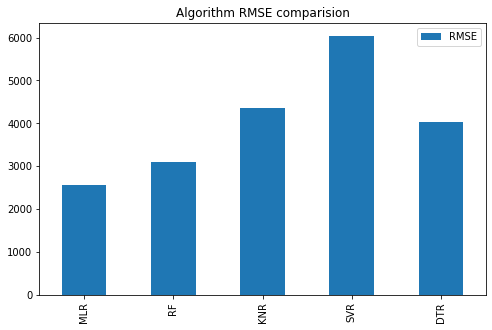

In [7]:
#Analysing results with top 9 features

X=new_data.drop('Price_per_100kg',1)


#y-target features
Y=new_data.iloc[:,new_data.columns == 'Production'].values
#X-input features        
X=X.iloc[:,X.columns != 'Production'].values   


#3 Encoding the categorical variables:
labelencoder_X = LabelEncoder()

#Change the text into numerical factors
X[: ,1]= labelencoder_X.fit_transform(X[: ,1])
X[: ,7]= labelencoder_X.fit_transform(X[: ,7])

##################to show OLS summarry#####################
onehotencoder= OneHotEncoder()

#turn the numbers to dummy variables. Each column represents one 
#state compare the X and dataset tables to understand the 
#relationship between the state and the columns
X= onehotencoder.fit_transform(X).toarray()
##################to show OLS summarry#####################

#5 Splitting the dataset into the Training and Test dataset
#train_set_split: Split arrays or matrices into random train and #test subsets. %20 of the dataset to the test set
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.3, random_state=33)
# prepare models
models = []
models.append(('Multiple Linear Regression', LinearRegression()))
models.append(('Random Forest Regression', RandomForestRegressor(max_depth=10, random_state=21)))
models.append(('K Neighbors Regression', KNeighborsRegressor(n_neighbors=8)))
models.append(('Support Vector Regression', SVR(C=1.0, epsilon=0.2)))
models.append(('Decision Tree Regression', DecisionTreeRegressor(random_state = 0)))

# evaluate each model in turn
rmse_scores = []
r_scores = []
names = []
predicted = []
actual = []

for name, model in models:
  
  model.fit(X_train,Y_train)
  
  #7 Predicting the Test set results:
  y_pred = np.round(model.predict(X_test),decimals=2)
  rmse = np.sqrt(mean_squared_error(Y_test,y_pred)) 
  r_score=r2_score(Y_test, y_pred)

  #storing value in array to be used in data frame
  predicted=y_pred
  actual=Y_test
  rmse_scores.append(np.round(rmse,2))
  r_scores.append(np.round(r_score*100,2))
  names.append(name)


df=pd.DataFrame({'Algorithm': names,'RMSE': rmse_scores, 'R2_Score': r_scores})



#df.boxplot(by="name", column="RMSE")
plotdata = pd.DataFrame({"RMSE":rmse_scores},index=['MLR','RF','KNR','SVR','DTR'])
plotdata.plot.bar(figsize=(8,5),title="Algorithm RMSE comparision")

df


Importances
Area                       0.387334
Rainfall_mm                0.223117
Temp_min                   0.098945
Rainfall previous year     0.069634
Crop                       0.066865
Temp_max                   0.063598
Gdp_in_100,000             0.052037
Year                       0.035102
Season                     0.003367

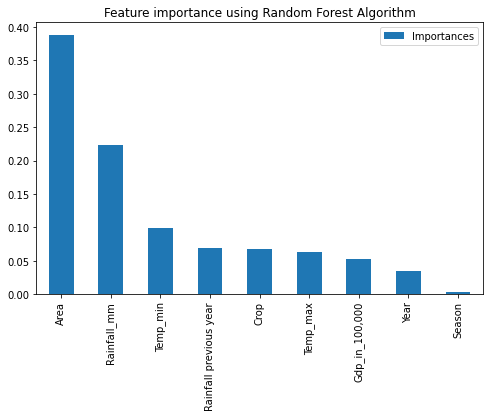

In [8]:
X=new_data.drop('Production',1)
X=X.drop('Price_per_100kg',1)
y=new_data['Production']

#Encoding the categorical variables:
labelencoder_X = LabelEncoder()

X['Season']= labelencoder_X.fit_transform(X['Season'])
X['Crop']= labelencoder_X.fit_transform(X['Crop'])
#Splitting the dataset into the Training and Test dataset
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.3, random_state=33)

regressor=RandomForestRegressor()
regressor.fit(X_train,Y_train)

#Creating dataframe of feature importances
feature_importances = pd.DataFrame(regressor.feature_importances_,
                                   index = X_train.columns,columns=['Importances']).sort_values('Importances',ascending=False)
        

# Plot the impurity-based feature importances of the forest
plotdata = pd.DataFrame(feature_importances,index=feature_importances.index)
plotdata.plot.bar(figsize=(8,5),title="Feature importance using Random Forest Algorithm")



feature_importances   

In [9]:
#Means absolute error of Linear and random forest regression

X=new_data.drop('Price_per_100kg',1)


#y-target features
Y=new_data.iloc[:,new_data.columns == 'Production'].values
#X-input features        
X=X.iloc[:,X.columns != 'Production'].values   


#3 Encoding the categorical variables:
labelencoder_X = LabelEncoder()

#Change the text into numerical factors
X[: ,1]= labelencoder_X.fit_transform(X[: ,1])
X[: ,7]= labelencoder_X.fit_transform(X[: ,7])

##################to show OLS summarry#####################
onehotencoder= OneHotEncoder()

#turn the numbers to dummy variables. Each column represents one 
#state compare the X and dataset tables to understand the 
#relationship between the state and the columns
X= onehotencoder.fit_transform(X).toarray()
##################to show OLS summarry#####################

#5 Splitting the dataset into the Training and Test dataset
#train_set_split: Split arrays or matrices into random train and #test subsets. %20 of the dataset to the test set
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.3, random_state=33)
# prepare models
models = []
models.append(('Multiple Linear Regression', LinearRegression()))
models.append(('Random Forest Regression', RandomForestRegressor(max_depth=10, random_state=21)))

# evaluate each model in turn
rmse_scores = []
names = []
m_ab_ers = []
m_ab_er_pers = []
r_scores= []

for name, model in models:
  
  model.fit(X_train,Y_train)
  
  #7 Predicting the Test set results:
  y_pred = np.round(model.predict(X_test),decimals=2)
  rmse = np.sqrt(mean_squared_error(Y_test,y_pred)) 
  m_ab_er=mean_absolute_error(Y_test, y_pred, multioutput='raw_values')
  m_ab_er_per=np.round(np.mean(np.abs((Y_test - y_pred) / Y_test)) * 100,2)

  r_score=r2_score(Y_test, y_pred)

  #storing value in array to be used in data frame
  r_scores.append(np.round(r_score*100,2))
  rmse_scores.append(np.round(rmse,2))
  names.append(name)
  m_ab_ers.append(m_ab_er)
  m_ab_er_pers.append(m_ab_er_per)

df=pd.DataFrame({'Algorithm': names,'RMSE': rmse_scores,'R score':r_scores, 'Mean abs error': m_ab_ers, 'Mean abs error %':m_ab_er_pers})

df


Algorithm     RMSE  ...        Mean abs error Mean abs error %
0  Multiple Linear Regression  2562.05  ...  [2088.8735714285717]             8.31
1    Random Forest Regression  3089.32  ...  [2773.1385714285716]            24.58

[2 rows x 5 columns]

In [10]:
np.random.seed(0)
  #difference=pd.DataFrame({'Actual': [actual], 'Predicted': [predicted] })
  #diff=diff.insert(difference)
X=new_data.drop('Production',1)
X=X.drop('Price_per_100kg',1)
y=new_data['Production']

#Encoding the categorical variables:
labelencoder_X = LabelEncoder()

X['Season']= labelencoder_X.fit_transform(X['Season'])
X['Crop']= labelencoder_X.fit_transform(X['Crop'])
#Splitting the dataset into the Training and Test dataset
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.3, random_state=33)

regressor=LinearRegression()
regressor_rf=RandomForestRegressor()
regressor.fit(X_train,Y_train)
regressor_rf.fit(X_train,Y_train)
y_pred=regressor.predict(X_test)
y_pred_rf=regressor_rf.predict(X_test)


#converting two d array into one d array
arr=[]
for i in y_pred:
  for v in i:
    arr.append(v)

#storing values in a dataframe
difference=pd.DataFrame(columns=['Actual Value','Predicted Value LR','Predicted Value RF','LR error','RF error'])

difference['Predicted Value LR']=np.round(arr,2)
difference['Predicted Value RF']=np.round(y_pred_rf[np.arange(len(y_pred_rf))],2)
difference['Actual Value']=Y_test[np.arange(len(Y_test))]
difference['LR error']=difference['Predicted Value LR']-difference['Actual Value']
difference['RF error']=difference['Predicted Value RF']-difference['Actual Value']


difference

Actual Value  Predicted Value LR  Predicted Value RF  LR error  RF error
0          35332            34805.96            37535.16   -526.04   2203.16
1          18438            17895.75            22803.22   -542.25   4365.22
2          32283            32569.21            28304.62    286.21  -3978.38
3          20304            21731.48            21680.14   1427.48   1376.14
4          26100            31910.70            26021.86   5810.70    -78.14
5          17909            17004.62            20215.23   -904.38   2306.23
6          25051            25332.15            24196.91    281.15   -854.09
7          18211            19101.93            22439.11    890.93   4228.11
8          31871            32125.32            29046.81    254.32  -2824.19
9          26877            33197.44            27839.30   6320.44    962.30
10         30360            29673.42            27418.97   -686.58  -2941.03
11         23225            22116.29            25259.98  -1108.71   2034.98
12         30675            26682.57            25511.13  -3992.43  -5163.87
13         32789            31774.45            30757.46  -1014.55  -2031.54

In [11]:
from scipy import stats


print("Mean error of LR and RF respectively",np.mean(np.absolute(difference['LR error'])),
      np.mean(np.absolute(difference['RF error'])),"\n")
#print(np.mean(difference['LR error']),np.mean(difference['RF error']))

stats.ttest_rel(difference['LR error'],difference['RF error'])


Mean error of LR and RF respectively 1717.5835714285718 2524.812857142857 



Ttest_relResult(statistic=0.5261469249217952, pvalue=0.6076459591279157)